# 라이엇 API를 이용해 수집한 2020 마스터이상 상위 랭크 매치 인게임   
# 데이터 분석을 통한 승패 예측 이진 분류 AI모델 만들기

#### 참고 
- yoon1seok.tistory.com
- shinminyong.tistory.com

## LOL  게임의 승리 조건 확인 및 승패에 영향 미치는 요소 분석
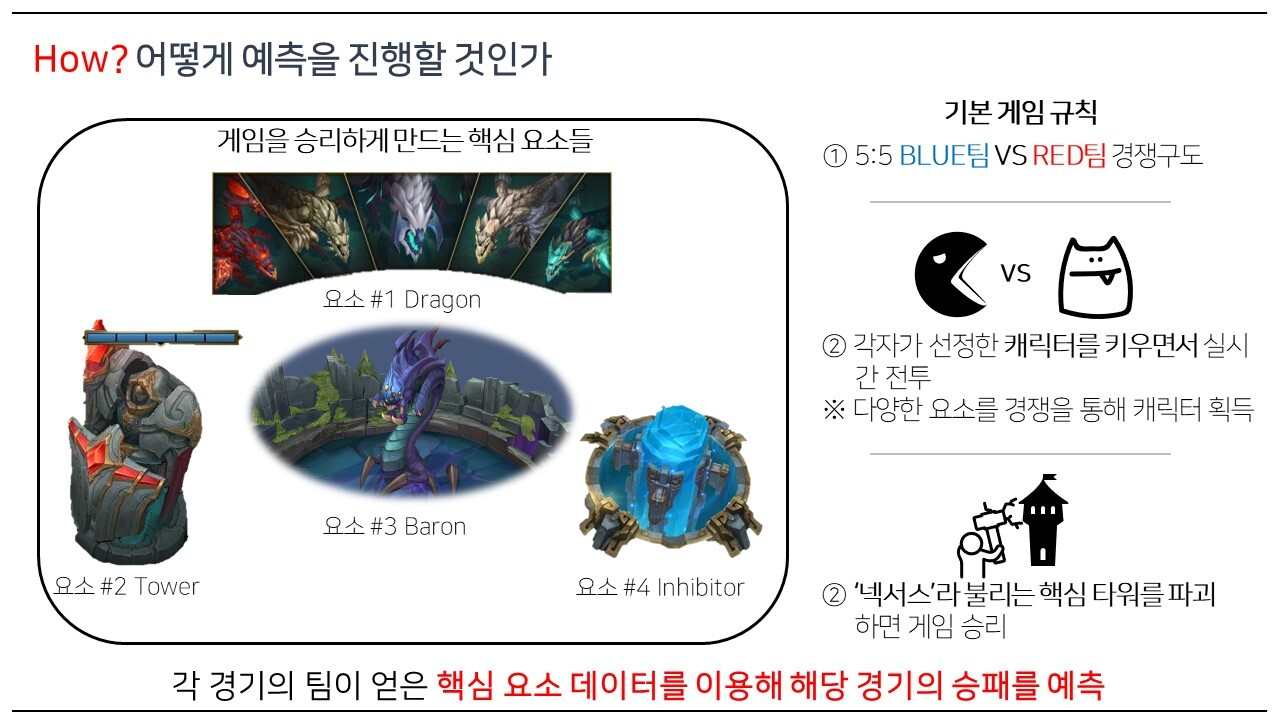

## 라이엇 api 활용
> 1.라이엇 api키 발급  
2.상위 랭크 사용자의 닉네임 요청  
3.닉네임을 통한 계정 고유 ID값 요청  
4.계정 고유 ID를 통한 특정 인게임ID 요청  
5.게임 고유 ID를 통한 인게임 내용 데이터 요청

### !! 데이터 수집시 수집량의 제한이 있어 데이터 수집 알고리즘 자동화 필요
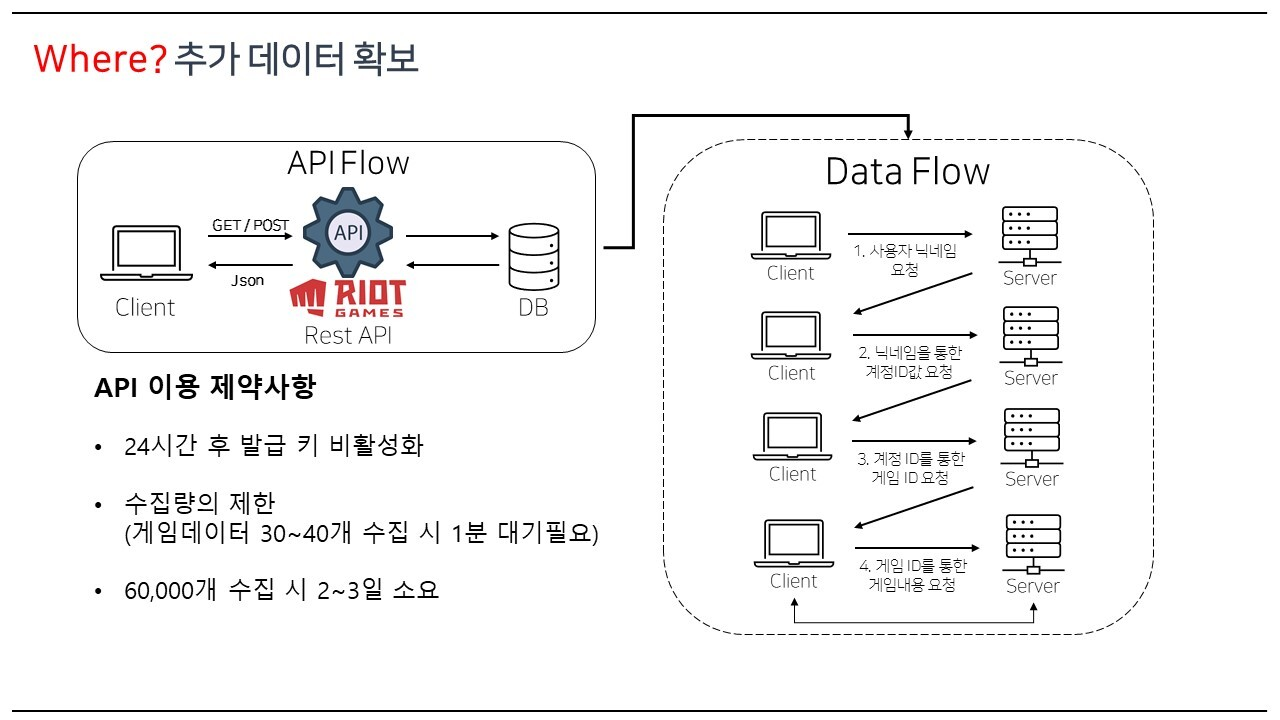

## 데이터 수집 방식

> 1.OP.GG 웹 사이트에서 크롤링을 통한 데이터 수집이 가능하다.  
2.라이엇 api를 활용한 매칭 데이터 수집이 가능하다.  
3. 여러 방식이 가능하지만 데이터 수집 부분은 데이터 수집 파트에서 더 자세히 다루도록 하며 본 미니 프로젝트는 2020년도 기준 미리 수집된 캐글의 데이터셋을 사용한다.

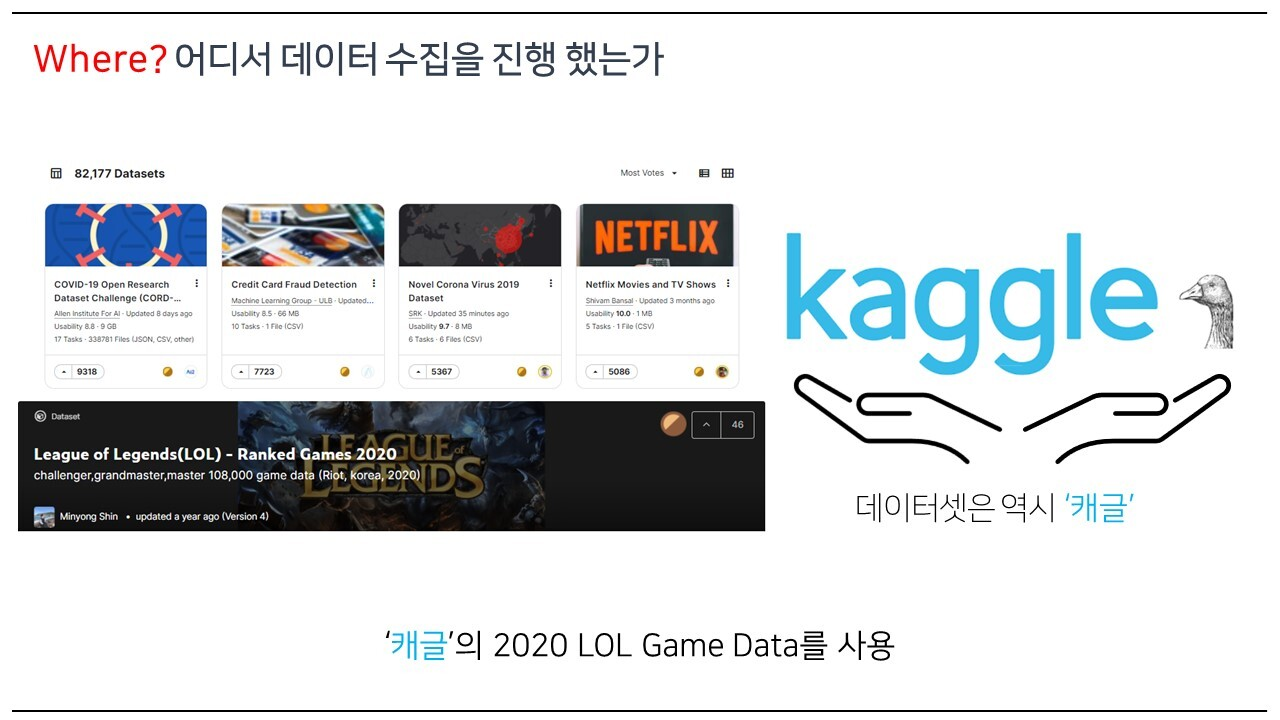

# 데이터셋 분석

### 챌린저 게임 매칭 데이터(v1,v2) - 챌린저 플레이어 id로 수집됨

> 컬럼분석  
gameid : 한 게임이 가지는 자체 고유 id  
season : 게임의 시즌 정보(1년마다 1씩 시즌이 증가됨)  
role : 해당 플레이어가 플레이 하게 되는 역할 (포지션)  
lane : 해당 플레이어가 플레이 하게될 라인  
accountId : 플레이어 고유 Id

In [1]:
import pandas as pd


##챌린저 게임 매칭 데이터 -> v1과 v2가 있음
challenger_match_v1_df = pd.read_csv('./datasets/all_dataset/challenger_match.csv')
challenger_match_v2_df =  pd.read_csv('./datasets/all_dataset/challenger_match_V2.csv')
display(challenger_match_v1_df)
display(challenger_match_v2_df)

##accountId 별로 100개씩 있는걸로 보아 소환사 한명당 100개의 개임 매칭 데이터를 수집
## -> gameId가 중복이 가능할 수 있음
display(challenger_match_v1_df["accountId"].value_counts())


,Unnamed: 0,gameId,season,role,lane,accountId
0,0,4260630568,13,DUO_SUPPORT,BOTTOM,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
1,1,4260452798,13,DUO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
2,2,4260353406,13,SOLO,MID,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
3,3,4260272376,13,SOLO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
4,4,4260082928,13,SOLO,MID,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
...,...,...,...,...,...,...
29995,95,4222879292,13,DUO_SUPPORT,BOTTOM,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg
29996,96,4222613796,13,DUO_SUPPORT,BOTTOM,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg
29997,97,4222481428,13,DUO,NONE,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg
29998,98,4221929785,13,DUO_CARRY,BOTTOM,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg


,Unnamed: 0,gameId,season,role,lane,accountId
0,0,4118590836,13,SOLO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
1,1,4118495113,13,DUO_SUPPORT,NONE,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
2,2,4118432488,13,DUO_SUPPORT,NONE,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
3,3,4118306793,13,SOLO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
4,4,4105344112,13,DUO_SUPPORT,NONE,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
...,...,...,...,...,...,...
59344,95,4165335600,13,DUO,NONE,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg
59345,96,4164540964,13,DUO_SUPPORT,BOTTOM,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg
59346,97,4164397966,13,DUO_SUPPORT,BOTTOM,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg
59347,98,4164339196,13,DUO_SUPPORT,BOTTOM,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg


accountId
IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo             100
_Z2V4hvTwrA2Hx1dA2LLqNxDzqRQoX0ouBaJJ2HlZKW4oi0KXRJLlvdj    100
9nFIYXSiwY19z5DMFpJAqRIPpTJTJAuiuFjQ1jFlZtwfg_Q             100
lMdqIXJOlsclUBJouKkeNVzwxqv_YYO9qm-F2VC_aS02fbXPG9AKQAn6    100
sy4m2BAZNV4zOnlUwsjVtBsDfbGftd5NHEXYUDDibFfK5Yw             100
                                                           ... 
M016KHsup8GynQ8zx3GkfCjh1q2bQgSA1rAzUOzPQr_CuyI             100
VRz4fQAyDf_vFle88u9ikVssnEnBwIiZTn-7yovCZDXa                100
G61f14trrpaAYfbljg6mdLe37jvchXWQ72SH5ZteGJNM4i0             100
mpgZcTBf6DC_Jth2IzwlCtIson6Udj-EEbOA4GsFGwzxGVKFpou2ba--    100
N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg                100
Name: count, Length: 300, dtype: int64

## 챌린저 게임 매칭 데이터 분석 결과
> 1. 게임 매칭 데이터 -> v1과 v2가 있음
2. accountId 별로 100개씩 있는걸로 보아 소환사 한명당 100개의 개임 매칭 데이터를 수집 -> gameId가 중복이 가능할 수 있음  
3. 모든 accountId는 챌린저 티어 소환사의 id이며 한 row가 나타내는 데이터는 해당 유저가 포함된 게임 id와 배정받은 라인 및 역할을 나타냄  

## 챌린저 게임 매칭 데이터 전처리
1. v1과 v2 데이터셋을 합친 후 gameId 가 중복된 데이터를 제거해 챌린저 반드시 한명은 포함되면서 중복되지 않은 gameId를 가진 데이터셋 구성
2. 상위랭크 인게임 데이터 셋에서 챌린저가 포함된 게임만 추출하고 싶은 경우non_duplicated_game_match_df_with_at_least_one_challenger_player로 만들어 놓은 df의 gameId와 join해서 추출 가능

In [2]:
# 중복 게임 id 존재
display(challenger_match_v1_df["gameId"].duplicated().sum())

#두 데이터를 합친 후 게임id가 같은 데이터 중복 제거
non_duplicated_game_match_df_with_at_least_one_challenger_player = pd.concat([challenger_match_v1_df,challenger_match_v2_df]).drop_duplicates(subset="gameId")
non_duplicated_game_match_df_with_at_least_one_challenger_player

17349

,Unnamed: 0,gameId,season,role,lane,accountId
0,0,4260630568,13,DUO_SUPPORT,BOTTOM,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
1,1,4260452798,13,DUO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
2,2,4260353406,13,SOLO,MID,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
3,3,4260272376,13,SOLO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
4,4,4260082928,13,SOLO,MID,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
...,...,...,...,...,...,...
59338,89,4166955955,13,NONE,JUNGLE,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg
59341,92,4166088160,13,DUO_SUPPORT,NONE,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg
59342,93,4165452507,13,DUO_CARRY,BOTTOM,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg
59343,94,4165371515,13,SOLO,TOP,N1zaglgoWTch14yyt0KL7P5iPKB5or3YBI0Ba44Pgwsg


## 인게임 상세 데이터 분석 (약 108000개)

> 컬럼분석  
gameCreation: 게임이 시작된 시간 또는 게임 생성 시간을 나타내는 타임스탬프  
gameDuration: 게임의 지속 시간을 나타내는 값(초단위)  
gameId: 게임의 고유 식별자로, 해당 게임을 식별하는 데 사용  
gameMode: 게임 모드를 나타내는 문자열, 예를 들어, "CLASSIC" 또는 "ARAM"과 같은 게임 모드가 여기에 포함  
gameType: 게임 유형을 나타내는 문자열로, 예를 들어 "MATCHED_GAME" 또는 "CUSTOM_GAME"과 같은 유형.  
gameVersion: 게임 클라이언트 버전을 나타내는 문자열  
mapId: 게임이 진행된 맵을 식별하는 ID ,예를 들어, "Summoner's Rift" 또는 "Howling Abyss"와 같은 맵을 나타냄  
participantIdentities: 게임에 참가한 플레이어의 정보와 식별자를 포함하는 데이터  
participants: 게임에 참가한 플레이어들의 인게임 정보와 행동 등을 포함하는 데이터  
platformId: 게임 플랫폼을 나타내는 문자열, 예를 들어, "KR" (한국 서버) 또는 "NA" (북미 서버)  
queueId: 게임 대기열을 나타내는 ID, 다양한 게임 모드와 대회 형식을 식별  
seasonId: 게임 시즌을 식별하는 ID로, 게임이 어느 시즌에 속하는지를 나타냄  
status.message: 게임 데이터 요청의 상태 메시지를 나타내는 문자열 예를 들어, 데이터 요청이 성공했을 때 "SUCCESS"  
status.status_code: 게임 데이터 요청의 상태 코드를 나타내는 숫자, 예를 들어, 성공적으로 요청된 경우 200과 같은 상태 코드가 여기에 포함됨  

In [ ]:
#전체 데이터 확인하기
import pandas as pd
high_rank_in_game_df= pd.read_csv('./datasets/all_dataset/match_data_version1.csv')
display(high_rank_in_game_df)
high_rank_in_game_df.info()


## 상위 랭크 게임 데이터 분석
> 1. 게임id별 한개의 인게임 데이터를 나타냄  
2. 인게임 대부분 정보는 하나의 데이터로 나타나고 플레이어들의 정보는 dict 형태로 participantIdentities컬럼에, 플레이어들의 인게임 정보는 dict 타입으로 participants에 존재

## 상위 랭크 게임 데이터 전처리
1. gameId 중복 데이터 제거  
2. 해당 프로젝트는 KR서버 소환사의 협곡 Classic rank game만을 취급하며 팀내 게임 탈주로 인한 10분 이내의 게임 종료된 데이터는 포함시키지 않음 -> 이에 맞도록 데이터 가공
3. 해당 프로젝트의 목적은 각 경기에 팀이 얻은 핵심 요소 데이터를 이용한 승 패 예측 이므로 이에 필요하지 않은 컬럼은 모두 제거  
4. 결측치 제거

In [4]:

#1. gaimeId 중복 데이터 제거
print(len(high_rank_in_game_df))
high_rank_in_game_df = high_rank_in_game_df.drop_duplicates(subset='gameId')
print(len(high_rank_in_game_df))

#2번 전처리에 맞게 하나씩 처리
#게임 시간이 10분 이내인 게임 제거
high_rank_in_game_df = high_rank_in_game_df[high_rank_in_game_df["gameDuration"]>10*60].reset_index(drop=True)
print(len(high_rank_in_game_df))

#게임모드가 CLASSIC 아닌것 제거
high_rank_in_game_df = high_rank_in_game_df[high_rank_in_game_df["gameMode"]=='CLASSIC'].reset_index(drop=True)
print(len(high_rank_in_game_df))

#게임 타입이 MATCHED_GAME 아닌것 제거
high_rank_in_game_df = high_rank_in_game_df[high_rank_in_game_df["gameType"]=='MATCHED_GAME'].reset_index(drop=True)
print(len(high_rank_in_game_df))

#mapId가 11.0인 데이터가 소환사의 협곡이므로 나머지 제거
high_rank_in_game_df = high_rank_in_game_df[high_rank_in_game_df["mapId"]==11].reset_index(drop=True)
print(len(high_rank_in_game_df))

#플랫폼이 한국서버가 아닌 데이터 제거
high_rank_in_game_df = high_rank_in_game_df[high_rank_in_game_df["platformId"]=='KR'].reset_index(drop=True)
print(len(high_rank_in_game_df))

#queueId가 420이 아니라면 대회 서버이므로 제거 
high_rank_in_game_df = high_rank_in_game_df[high_rank_in_game_df["queueId"]==420].reset_index(drop=True)
print(len(high_rank_in_game_df))

high_rank_in_game_df

108829
108773
106729
91262
91262
91256
91256
76871


,Unnamed: 0,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status.message,status.status_code
0,0,1.585155e+12,1323.0,4.247263e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
1,1,1.585152e+12,1317.0,4.247156e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
2,2,1.585059e+12,932.0,4.243963e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
3,3,1.584978e+12,2098.0,4.241678e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
4,4,1.584973e+12,2344.0,4.241539e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76866,0,1.576976e+12,934.0,4.039738e+09,CLASSIC,MATCHED_GAME,9.24.300.6382,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
76867,0,1.582406e+12,1418.0,4.170286e+09,CLASSIC,MATCHED_GAME,10.4.308.9400,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
76868,0,1.581059e+12,933.0,4.136207e+09,CLASSIC,MATCHED_GAME,10.3.307.1028,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
76869,0,1.580823e+12,1544.0,4.130964e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN


In [5]:
#3. 해당 프로젝트의 목적은 각 경기에 팀이 얻은 핵심 요소 데이터를 이용한 승 패 예측 이므로 이에 필요하지 않은 컬럼은 모두 제거
#게임 진행시간,소환사 인게임 정보 이 두개의 데이터 말고는 필요 없음, 게임 id는 챌린저 게임 id와 join할 수 있으므로 남겨둠.
high_rank_in_game_df = high_rank_in_game_df[['gameId','gameDuration','participants']]
high_rank_in_game_df.loc[:,'gameId']=high_rank_in_game_df.loc[:,'gameId'].astype('int64')
print(high_rank_in_game_df.loc[0,'gameId'].astype('int64'))
high_rank_in_game_df.info()

#4.결측치 확인 -> 없음
display(high_rank_in_game_df.isna().sum())

#최종 데이터셋
high_rank_in_game_df

4247263043
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76871 entries, 0 to 76870
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gameId        76871 non-null  float64
 1   gameDuration  76871 non-null  float64
 2   participants  76871 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.8+ MB


gameId          0
gameDuration    0
participants    0
dtype: int64

,gameId,gameDuration,participants
0,4.247263e+09,1323.0,"[{'participantId': 1, 'teamId': 100, 'champion..."
1,4.247156e+09,1317.0,"[{'participantId': 1, 'teamId': 100, 'champion..."
2,4.243963e+09,932.0,"[{'participantId': 1, 'teamId': 100, 'champion..."
3,4.241678e+09,2098.0,"[{'participantId': 1, 'teamId': 100, 'champion..."
4,4.241539e+09,2344.0,"[{'participantId': 1, 'teamId': 100, 'champion..."
...,...,...,...
76866,4.039738e+09,934.0,"[{'participantId': 1, 'teamId': 100, 'champion..."
76867,4.170286e+09,1418.0,"[{'participantId': 1, 'teamId': 100, 'champion..."
76868,4.136207e+09,933.0,"[{'participantId': 1, 'teamId': 100, 'champion..."
76869,4.130964e+09,1544.0,"[{'participantId': 1, 'teamId': 100, 'champion..."


# 랭크게임 데이터 셋 중 participants컬럼에 담긴 정보를 바탕으로 필요한 데이터 추출

## 게임 플레이어 개개인의 인게임 데이터로부터 팀의 승리로 이끄는 중요지표 추출

### 주의!!
- participants 안의 데이터는 통으로 json 형태의 문자열 
- 문자열중 json타입의 키값이 ''코따옴표로 되어있으므로 ""쌍따옴표로 변경,False ->false, Ture => true, 공백처리

# 모델 학습 알고리즘을 고려한 피쳐 데이터 가공
- 1.한쪽 팀의 데이터만 가공 및 학습해 해당 팀의 승 패 예측  
➡️ 지표가 높아도 상대팀의 지표가 더 높을 수 있음 x  
- 2.양쪽 팀의 모든 데이터를 가공 및 학습하고 양쪽 팀의 승패를 나타낸 타겟 데이터를 한 쌍의 데이터셋으로 설정  
➡️ 모델 학습 및 전처리 데이터 전처리 시간이 너무 오래걸리며 feature가 너무 많아 학습에 부정적인 영향을 미칠 수 있음  
- 3.불린 타입 데이터는 True 또는 False 이므로 두팀 중 한팀만 나타내도 되며 neumeric 데이터는 각 팀 지표의 차를 구해 양수 또는 음수 표현  
➡️ feature의 갯수도 줄어드어 빠르고 학습 성능도 높을것이라 예상되어 이방법으로 피쳐 데이터 엔지니어링 진행


In [26]:

import json
#인게임 정보를 바탕으로 유의미한 정보만 선별 및 가공하여 새로운 데이터셋 만들기
teams_df = pd.DataFrame()


for i in high_rank_in_game_df[9000:10000].index:
    #participants 안의 데이터는 통으로 json 형태의 문자열 
    #문자열중 json타입의 키값이 ''코따옴표로 되어있으므로 ""쌍따옴표로 변경,False ->false, Ture => true, 공백처리
    one_ingame_data_dict_list = json.loads(high_rank_in_game_df.loc[i,"participants"].replace("'",'"').replace(" ","").replace("False","false").replace("True","true"))
    
    #kda 평균을 구하기 위한 리스트
    blue_KDA =[0,0,0]
    red_KDA=[0,0,0]
    
    #평균 레벨을 구하기 위한 리스트
    blue_total_level=0
    red_total_level=0
    for k,one_player_ingame_data in enumerate(one_ingame_data_dict_list) :
        ingame_statistics = one_player_ingame_data['stats']
        #블루팀
        if k<5 :
            #한번만 실행해도 되거나 초기화가 필요한 작업
            if k == 0 :
                teams_df.loc[i,"blueWins"] = ingame_statistics["win"]
                blue_KDA[0] = ingame_statistics["kills"]
                blue_KDA[1] = ingame_statistics["deaths"]
                blue_KDA[2] = ingame_statistics["assists"]
                teams_df.loc[i,"totalDamageDealtToChampionsDiff"] = ingame_statistics["totalDamageDealtToChampions"]
                teams_df.loc[i,"totalVisionScoreDiff"] = ingame_statistics["visionScore"]
                teams_df.loc[i,"totalGoldEarnedDiff"] = ingame_statistics["goldEarned"]
                teams_df.loc[i,"totalMinionsKilledDiff"] = ingame_statistics["totalMinionsKilled"]
                teams_df.loc[i,"totalNeutralMinionsKilledTeamJungleDiff"] = ingame_statistics["neutralMinionsKilledTeamJungle"]
                teams_df.loc[i,"totalNeutralMinionsKilledEnemyJungleDiff"] = ingame_statistics["neutralMinionsKilledEnemyJungle"]
                teams_df.loc[i,"totalVisionWardsBoughtInGameDiff"] = ingame_statistics["visionWardsBoughtInGame"]
                teams_df.loc[i,"totalWardsPlacedDiff"] = ingame_statistics["wardsPlaced"]
                teams_df.loc[i,"totalWardsKilledDiff"] = ingame_statistics["wardsKilled"]
                teams_df.loc[i,"totalWardsKilledDiff"] = ingame_statistics["wardsKilled"]
                #열명중 한명 -> 팀 데이터에서 추출
#                 teams_df.loc[i,"firstBloodKill"] = ingame_statistics["firstBloodKill"]
#                 teams_df.loc[i,"firstTowerKill"] = ingame_statistics["firstTowerKill"]
                
                #다섯명 평균
                blue_total_level=ingame_statistics["champLevel"]
#                 
               
                
            else :
                blue_KDA[0] += ingame_statistics["kills"]
                blue_KDA[1] += ingame_statistics["deaths"]
                blue_KDA[2] += ingame_statistics["assists"]
                teams_df.loc[i,"totalDamageDealtToChampionsDiff"] += ingame_statistics["totalDamageDealtToChampions"]
                teams_df.loc[i,"totalVisionScoreDiff"] += ingame_statistics["visionScore"]
                teams_df.loc[i,"totalGoldEarnedDiff"] += ingame_statistics["goldEarned"]
                teams_df.loc[i,"totalMinionsKilledDiff"] += ingame_statistics["totalMinionsKilled"]
                teams_df.loc[i,"totalNeutralMinionsKilledTeamJungleDiff"] += ingame_statistics["neutralMinionsKilledTeamJungle"]
                teams_df.loc[i,"totalNeutralMinionsKilledEnemyJungleDiff"] += ingame_statistics["neutralMinionsKilledEnemyJungle"]
                teams_df.loc[i,"totalVisionWardsBoughtInGameDiff"] += ingame_statistics["visionWardsBoughtInGame"]
                teams_df.loc[i,"totalWardsPlacedDiff"] += ingame_statistics["wardsPlaced"]
                teams_df.loc[i,"totalWardsKilledDiff"] += ingame_statistics["wardsKilled"]
                
                #열명중 한명 ->팀데이터에서 추출
#                 if(not teams_df.loc[i,"firstBloodKill"]):
#                     teams_df.loc[i,"firstBloodKill"] = ingame_statistics["firstBloodKill"]
#                 if(not teams_df.loc[i,"firstTowerKill"]):
#                     teams_df.loc[i,"firstTowerKill"] = ingame_statistics["firstTowerKill"]

                #다섯명 평균
                blue_total_level+=ingame_statistics["champLevel"]

        #레드팀 지표 빼기
        else:
            red_KDA[0] += ingame_statistics["kills"]
            red_KDA[1] += ingame_statistics["deaths"]
            red_KDA[2] += ingame_statistics["assists"]
            teams_df.loc[i,"totalDamageDealtToChampionsDiff"] -= ingame_statistics["totalDamageDealtToChampions"]
            teams_df.loc[i,"totalVisionScoreDiff"] -= ingame_statistics["visionScore"]
            teams_df.loc[i,"totalGoldEarnedDiff"] -= ingame_statistics["goldEarned"]
#             teams_df.loc[i,"totalDestroyTurretsDiff"] -= ingame_statistics["turretKills"]
#             teams_df.loc[i,"totalDestroyInhibitorsDiff"] -= ingame_statistics["inhibitorKills"]
            teams_df.loc[i,"totalMinionsKilledDiff"] -= ingame_statistics["totalMinionsKilled"]
            teams_df.loc[i,"totalNeutralMinionsKilledTeamJungleDiff"] -= ingame_statistics["neutralMinionsKilledTeamJungle"]
            teams_df.loc[i,"totalNeutralMinionsKilledEnemyJungleDiff"] -= ingame_statistics["neutralMinionsKilledEnemyJungle"]
            teams_df.loc[i,"totalVisionWardsBoughtInGameDiff"] = ingame_statistics["visionWardsBoughtInGame"]
            teams_df.loc[i,"totalWardsPlacedDiff"] -= ingame_statistics["wardsPlaced"]
            teams_df.loc[i,"totalWardsKilledDiff"] -= ingame_statistics["wardsKilled"]

            #다섯명 평균
            red_total_level+=ingame_statistics["champLevel"]
        
    #평균kda, 평균 레벨차이 컬럼 만들고 값 넣기
    teams_df.loc[i,"averageChampLevelDiff"] = blue_total_level/5-red_total_level/5
    if blue_KDA[1]==0:
        blue_KDA[1]=1
    if red_KDA[1]==0:
        red_KDA[1]=1
    teams_df.loc[i,"teamKDA_Diff"] = (blue_KDA[0]+blue_KDA[2])/blue_KDA[1] - (red_KDA[0]+red_KDA[2])/red_KDA[1]
        
# 최종 팀 데이터            
display(teams_df)

#팀데이터를 게임데이터에 붙이기
high_rank_in_game_plus_team_indicators_df_1000 = pd.concat([high_rank_in_game_df.iloc[teams_df.index,:],teams_df],axis=1)


#이제 participants 컬럼 필요없으므로 드랍
high_rank_in_game_plus_team_indicators_df_1000= high_rank_in_game_plus_team_indicators_df_1000.drop('participants',axis=1)

display(high_rank_in_game_plus_team_indicators_df_1000)

,blueWins,totalDamageDealtToChampionsDiff,totalVisionScoreDiff,totalGoldEarnedDiff,totalMinionsKilledDiff,totalNeutralMinionsKilledTeamJungleDiff,totalNeutralMinionsKilledEnemyJungleDiff,totalVisionWardsBoughtInGameDiff,totalWardsPlacedDiff,totalWardsKilledDiff,averageChampLevelDiff,teamKDA_Diff
9000,True,11769.0,-6.0,7974.0,46.0,-2.0,5.0,3.0,-7.0,2.0,0.4,4.063492
9001,False,1339.0,11.0,-6798.0,-75.0,-26.0,-16.0,6.0,-5.0,3.0,-1.0,-1.730769
9002,False,13579.0,27.0,-6096.0,2.0,-7.0,-4.0,4.0,-1.0,7.0,-1.4,-0.392857
9003,True,-8856.0,-15.0,10626.0,49.0,-19.0,-28.0,3.0,-7.0,2.0,1.8,2.842579
9004,True,12645.0,20.0,10046.0,89.0,-6.0,17.0,1.0,3.0,6.0,1.8,4.443182
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,-20186.0,-13.0,-10902.0,44.0,6.0,-20.0,2.0,-1.0,-1.0,-1.0,-2.641369
9996,False,-26603.0,-16.0,-13513.0,-70.0,-33.0,-24.0,10.0,12.0,-16.0,-2.0,-2.857143
9997,True,17790.0,9.0,6640.0,-3.0,17.0,18.0,1.0,-8.0,6.0,1.8,2.697133
9998,True,27297.0,31.0,15550.0,-16.0,33.0,68.0,1.0,-56.0,31.0,1.2,6.164983


,gameId,gameDuration,blueWins,totalDamageDealtToChampionsDiff,totalVisionScoreDiff,totalGoldEarnedDiff,totalMinionsKilledDiff,totalNeutralMinionsKilledTeamJungleDiff,totalNeutralMinionsKilledEnemyJungleDiff,totalVisionWardsBoughtInGameDiff,totalWardsPlacedDiff,totalWardsKilledDiff,averageChampLevelDiff,teamKDA_Diff
9000,4.238965e+09,972.0,True,11769.0,-6.0,7974.0,46.0,-2.0,5.0,3.0,-7.0,2.0,0.4,4.063492
9001,4.238870e+09,1240.0,False,1339.0,11.0,-6798.0,-75.0,-26.0,-16.0,6.0,-5.0,3.0,-1.0,-1.730769
9002,4.238838e+09,1638.0,False,13579.0,27.0,-6096.0,2.0,-7.0,-4.0,4.0,-1.0,7.0,-1.4,-0.392857
9003,4.238739e+09,1736.0,True,-8856.0,-15.0,10626.0,49.0,-19.0,-28.0,3.0,-7.0,2.0,1.8,2.842579
9004,4.235088e+09,917.0,True,12645.0,20.0,10046.0,89.0,-6.0,17.0,1.0,3.0,6.0,1.8,4.443182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.244465e+09,1848.0,False,-20186.0,-13.0,-10902.0,44.0,6.0,-20.0,2.0,-1.0,-1.0,-1.0,-2.641369
9996,4.244326e+09,1579.0,False,-26603.0,-16.0,-13513.0,-70.0,-33.0,-24.0,10.0,12.0,-16.0,-2.0,-2.857143
9997,4.244219e+09,1296.0,True,17790.0,9.0,6640.0,-3.0,17.0,18.0,1.0,-8.0,6.0,1.8,2.697133
9998,4.243951e+09,2017.0,True,27297.0,31.0,15550.0,-16.0,33.0,68.0,1.0,-56.0,31.0,1.2,6.164983


In [27]:
# 1000개씩 데이터 합치기 한번에하면 엄청 느림
# high_rank_in_game_plus_team_indicators_df = pd.DataFrame()
high_rank_in_game_plus_team_indicators_df = pd.concat([high_rank_in_game_plus_team_indicators_df,high_rank_in_game_plus_team_indicators_df_1000],axis=0)
high_rank_in_game_plus_team_indicators_df

,gameId,gameDuration,blueWins,totalDamageDealtToChampionsDiff,totalVisionScoreDiff,totalGoldEarnedDiff,totalMinionsKilledDiff,totalNeutralMinionsKilledTeamJungleDiff,totalNeutralMinionsKilledEnemyJungleDiff,totalVisionWardsBoughtInGameDiff,totalWardsPlacedDiff,totalWardsKilledDiff,averageChampLevelDiff,teamKDA_Diff
0,4.247263e+09,1323.0,False,-16977.0,-29.0,-12831.0,-93.0,5.0,-6.0,7.0,-12.0,-4.0,-1.6,-5.406452
1,4.247156e+09,1317.0,True,16025.0,14.0,3936.0,-40.0,-34.0,-13.0,0.0,11.0,0.0,0.8,5.407895
2,4.243963e+09,932.0,False,-6783.0,-22.0,-12435.0,-94.0,4.0,-21.0,2.0,-12.0,-2.0,-1.6,-7.350000
3,4.241678e+09,2098.0,False,-24259.0,6.0,-7081.0,-58.0,24.0,-10.0,6.0,33.0,-17.0,-0.8,-2.181624
4,4.241539e+09,2344.0,True,3290.0,41.0,359.0,37.0,24.0,15.0,12.0,14.0,-8.0,-0.4,-2.705556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.244465e+09,1848.0,False,-20186.0,-13.0,-10902.0,44.0,6.0,-20.0,2.0,-1.0,-1.0,-1.0,-2.641369
9996,4.244326e+09,1579.0,False,-26603.0,-16.0,-13513.0,-70.0,-33.0,-24.0,10.0,12.0,-16.0,-2.0,-2.857143
9997,4.244219e+09,1296.0,True,17790.0,9.0,6640.0,-3.0,17.0,18.0,1.0,-8.0,6.0,1.8,2.697133
9998,4.243951e+09,2017.0,True,27297.0,31.0,15550.0,-16.0,33.0,68.0,1.0,-56.0,31.0,1.2,6.164983


# 게임 매치에서 개인이 아닌 팀 전체에 대한 데이터셋 분석  
팀 오브젝트 획득에 대한 데이터


> 컬럼분석  
teamId - 경기내의 파랑팀 (100) / 경기내의 빨강팀 (200)  
win - 승 / 패 , target_variable로 사용할 변수입니다. (W/F)  
firstBlood - 가장 먼저 상대팀의 챔피언을 킬했는지 여부. (T/F)  
firstTower - 가장 먼저 상대팀의 포탑을 깻는지 여부. (T/F)  
firstinhibitor - 가장 먼저 상대팀의 억제기를 깻는지 여부. (T/F)  
firstBaron - 가장 먼저 바론을 먹었는지 여부. (T/F)  
firstDragon - 가장 먼저 드래곤을 먹었는지 여부. (T/F)  
firstRiftHerald - 가장 먼저 전령을 먹었는지 여부. (T/F)  
towerKills - 깬 타워의 수(연속형변수)  
inhibitorKills - 깬 억제기의 수(연속형변수)  
baronKills - 처치한 바론의 수(연속형변수)  
dragonKills - 처치한 드래곤의 수(연속형변수)  
vilemawKills - 상관하지 않아도 되는 변수입니다.(5:5 게임에는 없는 오브젝트)  
riftHeraldKills - 처치한 전령의 수 



## 팀 지표 데이터 분석 결과
> 1. 팀이 처음 획득한 승리 지표가 불린 값으로 존재  
2. 팀이 획득한 요소별 수가 연속형 값으로 존재  
3. 이긴팀과 진팀의데이터가 따로 있음 -> 하나로 합쳐야함 


## 팀 지표 데이터 전처리
> 1. 필요없는 컬럼 제거  - 이미 승패데이터는 있으므로 관련 컬럼제거, 해당 게임과 상관없는 데이터 제거  
2. gameId로 join  
3. 이긴팀과 진팀 사이의 컬럼 값들의 차를 구해 컬럼으로 추가







## 문제점!!! 첫 오브젝트 획득에 대한 컬럼에서 True라면 상대보다 먼저 획득한 것이고 False라면 상대가 먼저 획득한 것인데 양쪽팀 모두 획득하지 못하고 게임이 끝나는 경우는 어떻게 처리할까?

## 만약 첫 바론 획득이 승리에 큰 영향을 미친다고 판단했을때 False인 데이터는 상대가 가져갔다고 판단해 양쪽팀 모두 바론획득 없이 A팀이 압도적으로 이겼음에도 오작동할 가능성이 존재.

### 1번방안 : 어느한쪽도 오브젝트를 획득하지 못했다면 게임 데이터 자체를 이상치로 판단하고 제거함 ->양쪽팀중 어느 한팀이라도 오브젝트를 획득한 게임만 표본으로 사용 (데이터가 부족할때 효과적)

### 2번방안 : 성공, 실패, 중립을 나누어 레이블 인코딩 진행  (데이터가 많을때 더 정밀한 예측 가능)



In [28]:
winner_team_df = pd.read_csv("./datasets/all_dataset/match_winner_data_version1.csv")
loser_team_df = pd.read_csv("./datasets/all_dataset/match_loser_data_version1.csv")

#필요없는 컬럼 제거
unused_columns = ['Unnamed: 0','teamId','win','vilemawKills','dominionVictoryScore','bans']
winner_team_df = winner_team_df.drop(unused_columns,axis=1)
loser_team_df = loser_team_df.drop(unused_columns,axis=1)

#중복 데이터 제거
winner_team_df =winner_team_df.drop_duplicates(subset="gameId")
loser_team_df =loser_team_df.drop_duplicates(subset="gameId")


#gameId로 조인
gameIds = high_rank_in_game_plus_team_indicators_df['gameId']
winner_team_df = winner_team_df[winner_team_df["gameId"].isin(gameIds)].reset_index(drop=True)
loser_team_df = loser_team_df[loser_team_df["gameId"].isin(gameIds)].reset_index(drop=True)


#차가 필요 없는 팀데이터 추가
#둘다 획득하지 못했을 수 있으므로 성공 실패 중립으로 나눈다.
TNF_columns = ['firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']
join_team_df = pd.DataFrame()
for index,blue_team_data in enumerate(high_rank_in_game_plus_team_indicators_df["blueWins"]):
    for column in TNF_columns:
        #두팀다 획득하지 못한경우
        if not(winner_team_df.loc[index,column] or loser_team_df.loc[index,column]):
            join_team_df.loc[index,column] = "neutral"
        else :
            #블루 팀이 이겼다면
            if bool(high_rank_in_game_plus_team_indicators_df.loc[index,"blueWins"]):
                #이긴팀 데이터셋이 true라면
                if winner_team_df.loc[index,column] :
                    join_team_df.loc[index,column] = 'success'
                else : 
                    join_team_df.loc[index,column] = 'fail'
            #블루 팀이 졌다면
            else :
                if winner_team_df.loc[index,column] :
                    join_team_df.loc[index,column] = 'fail'
                else : 
                    join_team_df.loc[index,column] = 'success'
                    



#나머지 팀 데이터 차를 구해 추가하기
sub_columns = ['towerKills','inhibitorKills','baronKills','dragonKills','riftHeraldKills']
for i in range(len(high_rank_in_game_plus_team_indicators_df)):
    for column in sub_columns:
        if high_rank_in_game_plus_team_indicators_df.loc[i,"blueWins"]:
            join_team_df.loc[i,column] = winner_team_df.loc[i,column] - loser_team_df.loc[i,column]
        else :
             join_team_df.loc[i,column] =  loser_team_df.loc[i,column]-winner_team_df.loc[i,column]
join_team_df


#팀데이터를 원래 데이터와 붙이기
final_high_rank_in_game_plus_team_indicators_df = pd.concat([high_rank_in_game_plus_team_indicators_df,join_team_df],axis=1)
final_high_rank_in_game_plus_team_indicators_df

,gameId,gameDuration,blueWins,totalDamageDealtToChampionsDiff,totalVisionScoreDiff,totalGoldEarnedDiff,totalMinionsKilledDiff,totalNeutralMinionsKilledTeamJungleDiff,totalNeutralMinionsKilledEnemyJungleDiff,totalVisionWardsBoughtInGameDiff,...,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
0,4.247263e+09,1323.0,False,-16977.0,-29.0,-12831.0,-93.0,5.0,-6.0,7.0,...,fail,fail,neutral,fail,fail,-9.0,-1.0,0.0,-3.0,-2.0
1,4.247156e+09,1317.0,True,16025.0,14.0,3936.0,-40.0,-34.0,-13.0,0.0,...,fail,neutral,neutral,success,success,2.0,0.0,0.0,2.0,2.0
2,4.243963e+09,932.0,False,-6783.0,-22.0,-12435.0,-94.0,4.0,-21.0,2.0,...,fail,fail,neutral,fail,fail,-5.0,-1.0,0.0,-2.0,-2.0
3,4.241678e+09,2098.0,False,-24259.0,6.0,-7081.0,-58.0,24.0,-10.0,6.0,...,fail,neutral,success,success,fail,-4.0,0.0,0.0,-2.0,-1.0
4,4.241539e+09,2344.0,True,3290.0,41.0,359.0,37.0,24.0,15.0,12.0,...,success,success,success,success,success,5.0,2.0,1.0,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.244465e+09,1848.0,False,-20186.0,-13.0,-10902.0,44.0,6.0,-20.0,2.0,...,fail,fail,fail,fail,fail,-8.0,-3.0,-1.0,0.0,-2.0
9996,4.244326e+09,1579.0,False,-26603.0,-16.0,-13513.0,-70.0,-33.0,-24.0,10.0,...,fail,fail,fail,success,fail,-8.0,-1.0,-1.0,-1.0,0.0
9997,4.244219e+09,1296.0,True,17790.0,9.0,6640.0,-3.0,17.0,18.0,1.0,...,success,neutral,neutral,success,success,1.0,0.0,0.0,3.0,2.0
9998,4.243951e+09,2017.0,True,27297.0,31.0,15550.0,-16.0,33.0,68.0,1.0,...,success,success,success,fail,success,11.0,3.0,1.0,1.0,1.0


## 데이터 수집, 전처리가 모두 끝난 csv파일 내보내기

In [30]:
final_high_rank_in_game_plus_team_indicators_df.to_csv("final_high_rank_in_game_plus_team_indicators_df.csv",index=False)

In [31]:
final_high_rank_in_game_plus_team_indicators_df.columns

Index(['gameId', 'gameDuration', 'blueWins', 'totalDamageDealtToChampionsDiff',
       'totalVisionScoreDiff', 'totalGoldEarnedDiff', 'totalMinionsKilledDiff',
       'totalNeutralMinionsKilledTeamJungleDiff',
       'totalNeutralMinionsKilledEnemyJungleDiff',
       'totalVisionWardsBoughtInGameDiff', 'totalWardsPlacedDiff',
       'totalWardsKilledDiff', 'averageChampLevelDiff', 'teamKDA_Diff',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 'towerKills', 'inhibitorKills',
       'baronKills', 'dragonKills', 'riftHeraldKills'],
      dtype='object')